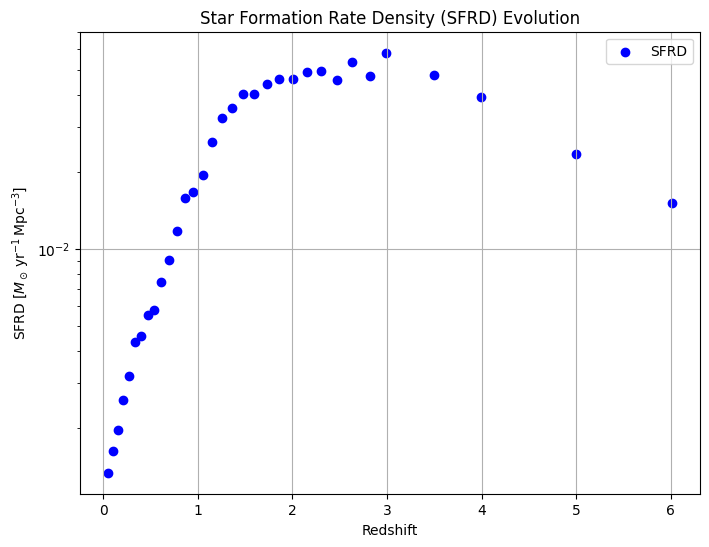

In [5]:
import astropy
import h5py
import numpy as np
import matplotlib.pyplot as plt
h = 0.6711

redshifts = []  
sfrd_values = []  

for i in range(0, 33):
    result = f"{i:02}"
    
    f_catalog = f"data/Output-simba/fof_subhalo_tab_0{result}.hdf5"
    file_path = f"data/Output-simba/snap_0{result}.hdf5"

    with h5py.File(f_catalog, 'r') as f, h5py.File(file_path, 'r') as data:
        
        SFR = data["PartType0/StarFormationRate"][:]
        arraySFR = np.array(SFR)
        SFRsum = arraySFR.sum()
        
        BoxSize = data["Header"].attrs["BoxSize"] * 1e-3
        redshift = data["Header"].attrs["Redshift"]

        physcialBoxsize = BoxSize/h #/(1+redshift)
        Boxvolume = physcialBoxsize * physcialBoxsize * physcialBoxsize
        
        sfrd_value = SFRsum/Boxvolume

        redshifts.append(redshift)
        sfrd_values.append(sfrd_value)  

plt.figure(figsize=(8, 6))
plt.scatter(redshifts, sfrd_values, color='b', marker='o', label="SFRD")
plt.xlabel("Redshift")
plt.ylabel("SFRD [$M_\odot \, \mathrm{yr}^{-1} \, \mathrm{Mpc}^{-3}$]")
plt.yscale("log") 
plt.title("Star Formation Rate Density (SFRD) Evolution")
plt.legend()
plt.grid(True)
plt.show()